# Task 1
## Principal Component Analysis

In [1]:
import copy

import numpy as np
import pandas as pd

from pca import *

Read and plot the data

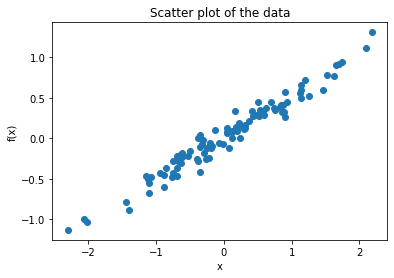

In [2]:
# plot the data
data = read_data()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.show()

Center the data and plot the centered data vs the original one

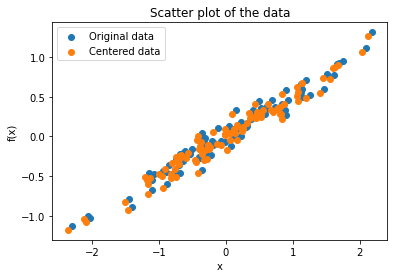

In [3]:
# plot the centered data vs the original one
centered_data = center_data(data)
plt.scatter(data[:, 0], data[:, 1], color='tab:blue', label='Original data')
plt.scatter(centered_data[:, 0], centered_data[:, 1], color='tab:orange', label='Centered data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()


SVD decomposition of the (centered) data

In [4]:
# SVD decomposition
U, S, V = svd(centered_data, center=False)

# check that "data" can be reconstructed from U, S and Vt
print("Norm of the difference between the centered data and its reconstruction through SVD: ",
      np.linalg.norm(centered_data - U @ S @ V.T))

Norm of the difference between the centered data and its reconstruction through SVD:  5.175015341989463e-15


The difference of between the centered data and its reconstruction
through the SVD is very small, therefore we can state that the SVD
is computed correctly.

How much energy is contained into each of the 2 components?

In [5]:
sigma1, sigma2 = S[0, 0], S[1, 1]
tot = sigma1 + sigma2
perc_energy_sigma1 = sigma1 * 100 / tot
perc_energy_sigma2 = sigma2 * 100 / tot
print(f"sigma1 contains {round(perc_energy_sigma1, 2)}% of the energy")
print(f"sigma2 contains {round(perc_energy_sigma2, 2)}% of the energy")

sigma1 contains 92.33% of the energy
sigma2 contains 7.67% of the energy


Plot the (centered) data its 2 principal components

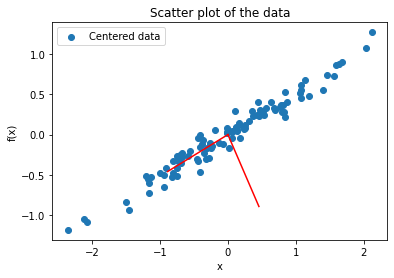

In [7]:
# scatter plot of the centered data
plt.scatter(centered_data[:, 0], centered_data[:, 1], label='Centered data')

# plot the 2 principal components as vectors
origin = np.mean(centered_data, axis=0)
m1, q1 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 0])
m2, q2 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 1])
# plt.scatter(V[:, 0], V[:, 1], color='red')
# plt.scatter(origin, origin, color='green')
# print(V[:, 0], V[:, 1])

# x = np.arange(-2, 2, 0.1)
# plt.plot(x, m1 * x + q1, color='g')
# x = np.arange(-0.5, 0.5, 0.1)
# plt.plot(x, m2 * x + q2, color='g')

x_values = [origin[0], V[:, 0][0]]
y_values = [origin[1], V[:, 0][1]]
plt.plot(x_values, y_values, color='r')

x_values = [origin[0], V[:, 1][0]]
y_values = [origin[1], V[:, 1][1]]
plt.plot(x_values, y_values, color='r')

# US = U @ S
# x_values = [origin[0], origin[0] + U[0, 0] * S[0, 0]]
# y_values = [origin[1], origin[1] + U[1, 0] * S[0, 0]]
# plt.plot(x_values, y_values, color='r')
#
# x_values = [origin[0], origin[0] + U[0, 1] * S[1, 1]]
# y_values = [origin[1], origin[1] + U[1, 1] * S[1, 1]]
# plt.plot(x_values, y_values, color='r')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()

### Part 2

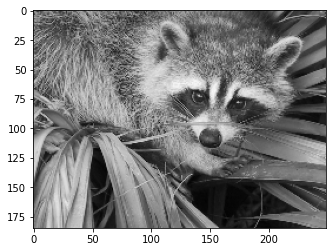

In [8]:
# Load and display the image of the racoon
racoon = load_racoon(display=True)

Apply PCA to the image and visualize the reconstruction

In [9]:
# SVD decomposition of the image
U, S, V = svd(racoon.T, center=True)       # transpose because the data points are the columns of the image

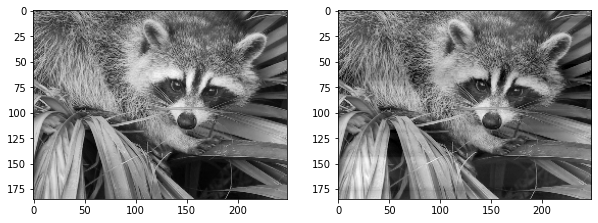

In [10]:
# show reconstruction with all the principal components
mean = np.mean(racoon)
reconstruction = (U @ S @ V.T).T + mean    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction)

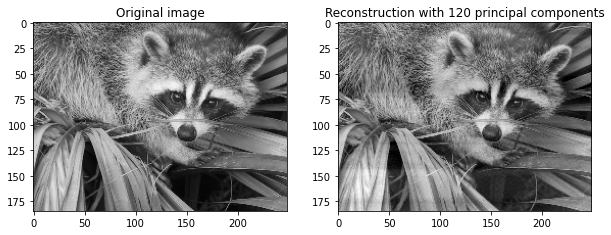

In [54]:
# show reconstruction with 120 principal components
S_120 = copy.deepcopy(S)
S_120[120:, 120:] = 0
reconstruction = (U @ S_120 @ V.T).T + mean    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 120 principal components"))

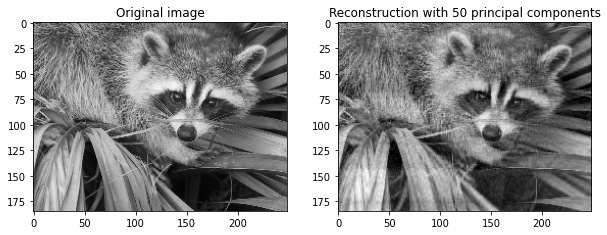

In [11]:
# show reconstruction with 50 principal components
S_50 = copy.deepcopy(S)
S_50[50:, 50:] = 0
reconstruction = (U @ S_50 @ V.T).T + mean    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 50 principal components"))


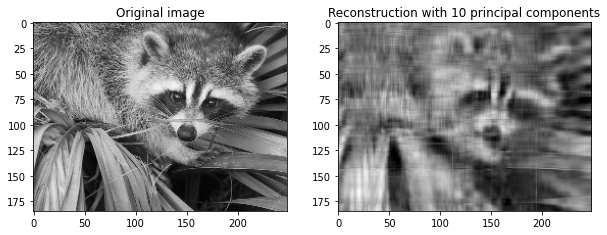

In [56]:
# show reconstruction with 10 principal components
S_10 = copy.deepcopy(S)
S_10[10:, 10:] = 0
reconstruction = (U @ S_10 @ V.T).T + mean    # transpose because the SVD has been applied to the transpose of the original image
show_2_images_grayscale(racoon, reconstruction, titles=("Original image", "Reconstruction with 10 principal components"))

Check at what point the energy loss is grater than 1%

In [12]:
# compute the percentage of the total energy captured by a different number of singular values
singular_values = np.diagonal(S)

energy_120 = np.sum(np.square(singular_values[:120])) / np.sum(np.square(singular_values))
energy_50 = np.sum(np.square(singular_values[:50])) / np.sum(np.square(singular_values))
energy_10 = np.sum(np.square(singular_values[:10])) / np.sum(np.square(singular_values))

print(f"The energy captured in the first 120 singular values is the {round(energy_120 * 100, 2)}% of the total")
print(f"The energy captured in the first 50 singular values is the {round(energy_50 * 100, 2)}% of the total")
print(f"The energy captured in the first 10 singular values is the {round(energy_10 * 100, 2)}% of the total")

The energy captured in the first 120 singular values is the 99.2% of the total
The energy captured in the first 50 singular values is the 93.19% of the total
The energy captured in the first 10 singular values is the 75.76% of the total


### Part 3

In [13]:
# read the trajectories data
trajs = pd.read_csv("data/data_DMAP_PCA_vadere.txt", header=None, sep=" ")
trajs.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7.682746,16.590135,13.483825,16.516303,4.094633,12.947896,6.185209,14.051827,2.384750,11.906402,...,7.618038,14.830008,5.793517,7.085613,13.165387,18.276296,10.980464,17.096179,5.906016,15.322550
1,8.145535,16.648409,13.277208,16.328543,4.044564,12.747607,6.039434,14.420585,2.158819,11.833650,...,7.307820,14.957749,5.541795,7.212933,13.209182,18.195222,11.202859,17.305462,5.822190,15.679348
2,7.887370,16.508989,13.481755,16.028657,3.819413,13.021751,5.865487,14.156773,1.987087,11.675436,...,7.386211,14.685901,5.426626,7.085823,13.417320,18.207198,11.005363,17.370636,5.552942,15.409457
3,7.946284,16.306714,13.712739,16.406934,4.325781,12.930226,5.501616,14.330293,1.944104,11.744856,...,7.323483,14.580033,5.046127,7.388251,13.822416,18.175465,11.041945,16.840682,5.196317,15.293325
4,7.890591,16.154034,13.680053,16.130988,4.193020,13.185905,6.015438,14.806179,1.696377,11.606308,...,6.681000,14.940958,5.360103,7.249443,13.255405,17.885457,11.012918,17.334755,5.829825,15.386860


In that dataframe there is a row for each time step and the columns refers to the
trajectories of different pedestrians in a 2D space: first 2 columns contain the
x and y positions of the trajectory of pedestrian 1, second 2 columns are for
pedestrian 2 and so on.

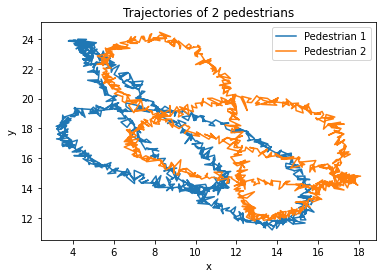

In [14]:
# save the trajectories of the first 2 pedestrians in 2 apposite dataframes
ped1 = trajs.loc[:, 0:1].to_numpy()
ped2 = trajs.loc[:, 2:3].to_numpy()

# plot the trajectories
plot_2_trajectories(ped1, ped2)

Use PCA to reduce the trajectories dataset to its 2 principal components

In [15]:
U, S, V = svd(trajs.to_numpy(), center=True)
singular_values = np.diagonal(S)
energy = np.sum(np.square(singular_values[0:2])) / np.sum(np.square(singular_values))
print(f"The energy captured by the first 2 principal components is {round(energy * 100, 2)}%")

The energy captured by the first 2 principal components is 84.92%


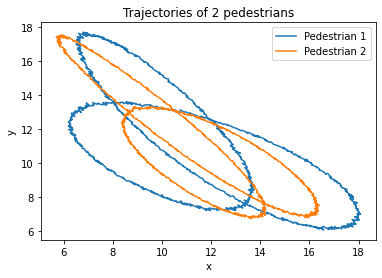

In [16]:
# plot the trajectories of the first 2 pedestrian when only the first 2 principal components are present
S_2 = copy.deepcopy(S)
S_2[2:, 2:] = 0
reconstruction = U @ S_2 @ V.T + np.mean(trajs.to_numpy())
ped1 = reconstruction[:, 0:2]
ped2 = reconstruction[:, 2:4]
plot_2_trajectories(ped1, ped2)

In [17]:
# check how many principal components are needed to retain at least 90% of the energy
for n_components in range(0, len(singular_values)):
      energy = np.sum(np.square(singular_values[0:n_components])) / np.sum(np.square(singular_values))
      if energy >= 0.9:
            print(f"To retain at least 90% of the energy we need at least the first {n_components} principal components.")
            print(f"The first {n_components} principal components capture {round(energy * 100, 2)}% of the energy")
            break


To retain at least 90% of the energy we need at least the first 3 principal components.
The first 3 principal components capture 99.71% of the energy
